In [37]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from collections import Counter
with h5py.File("C:\\Users\\Varun Parashar\\usps.h5", 'r') as hf:
        train = hf.get('train')
        X_tr1 = train.get('data')[:]
        y_tr1 = train.get('target')[:]
        test = hf.get('test')
        X_te1 = test.get('data')[:]
        y_te1 = test.get('target')[:]

In [38]:
X_tr=np.vstack((X_tr1,X_te1))
y_tr=np.hstack((y_tr1,y_te1))
y_tr=y_tr.reshape(9298,1)
X_tr=np.hstack((X_tr,y_tr))
np.random.shuffle(X_tr)
y_tr=X_tr[:,-1]
X_tr=X_tr[:,0:256]

In [39]:
l_tr=X_tr.shape[0]
x=l_tr/5
print(X_tr.shape,x)

(9298, 256) 1859.6


In [40]:
X_tr1=X_tr[0:int(x)]
X_tr2=X_tr[int(x):int(x)*2]
X_tr3=X_tr[2*int(x):int(x)*3]
X_tr4=X_tr[3*int(x):4*int(x)]
X_tr5=X_tr[4*int(x):]
y_tr1=y_tr[0:int(x)]
y_tr2=y_tr[int(x):int(x)*2]
y_tr3=y_tr[2*int(x):int(x)*3]
y_tr4=y_tr[3*int(x):4*int(x)]
y_tr5=y_tr[4*int(x):]

In [41]:
X_tr=np.vstack((X_tr1,X_tr2,X_tr5,X_tr4))
y_tr=np.hstack((y_tr1,y_tr2,y_tr5,y_tr4))
X_te=X_tr3
y_te=y_tr3
l_tr=X_tr.shape[0]
l_te=X_te.shape[0]
x=l_tr+l_te
print(x)

9298


3.0 3.0


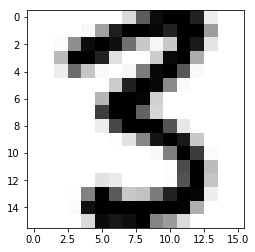

In [42]:
def Sort_Tuple(tup):  
    return(sorted(tup, key = lambda x: x[0]))
def knn(k,X_tr,X_te,m):
    l=[]
    lsort=[]
    pred=[]
    for i in range(m,m+1):
        for j in range(0,l_tr):
            x=np.sqrt(np.sum((np.square(X_te[i,:]-X_tr[j,:])),axis=0))
            l.append((x,y_tr[j]))
        lsort=Sort_Tuple(l)
        for i in range(0,k):
            pred.append(lsort[i][1])
        counter=Counter(pred)
        print(counter.most_common(1)[0][0],y_te[m])
    img=X_te[m].reshape(16,16)
    plt.imshow(img,cmap='Greys')
    plt.show()
knn(4,X_tr,X_te,9)